# More examples

Based on examples by Jan von Harten:

https://github.com/cgre-aachen/gempy/tree/master/notebooks/examples

In [1]:
import numpy as np
from scipy.interpolate import Rbf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm



In [2]:
plt.rcParams['figure.figsize'] = (8., 6.)
plt.rcParams['font.size'] = 16.

In [13]:
rock1 = np.loadtxt('jan_model3_rock1.csv', delimiter=',', skiprows=1, usecols=[0,1,2])
rock2 = np.loadtxt('jan_model3_rock2.csv', delimiter=',', skiprows=0, usecols=[0,1,2])
# select only points for y = 500
rock1 = rock1[np.where(rock1[:,1]==500)]
rock2 = rock2[np.where(rock2[:,1]==500)]



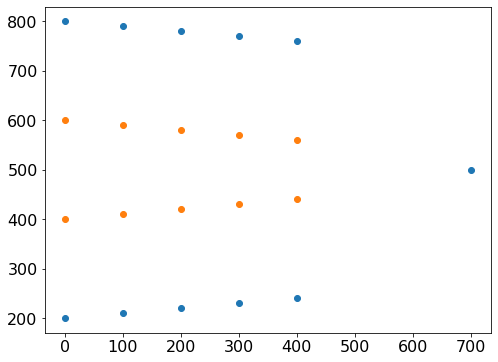

In [15]:
plt.plot(rock1[:,0], rock1[:,2], 'o')
plt.plot(rock2[:,0], rock2[:,2], 'o')

In [23]:
# set up grid
ti = np.linspace(0, 1000, 100)
XI, YI = np.meshgrid(ti, ti)

# combine data:
x = np.hstack([rock1[:,0], rock2[:,0]])
y = np.hstack([rock1[:,2], rock2[:,2]])
z = np.hstack([np.ones_like(rock1[:,0])*10, np.ones_like(rock2[:,0])*20])

In [24]:
# use RBF
rbf = Rbf(x, y, z, function="thin_plate")
ZI = rbf(XI, YI)



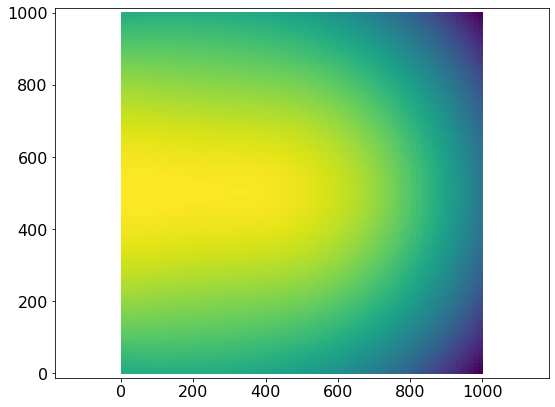

In [25]:
plt.pcolor(XI, YI, ZI)
# plt.contour(XI, YI, ZI, 20, alpha=0.6, colors='k')
plt.axis('equal')
# plt.xlim([0,100])
# plt.ylim([0,100])
plt.tight_layout()

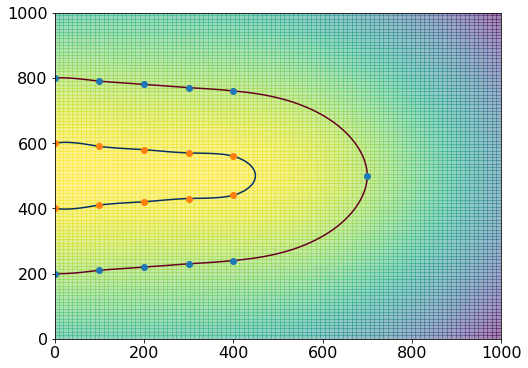

In [36]:
plt.pcolor(XI, YI, ZI, alpha=0.5)
plt.contour(XI, YI, ZI, [10,20], cmap='RdBu')
plt.plot(rock1[:,0], rock1[:,2], 'o')
plt.plot(rock2[:,0], rock2[:,2], 'o')